In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv('dataset/predict_energy_consumption.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.967142,31.723781,2.190688,648.318007,177.621142
1,18.617357,27.319749,0.367214,74.105423,235.830819
2,26.476885,64.550117,1.080258,375.468928,229.718452
3,35.230299,69.453301,3.388606,803.814545,229.861478
4,17.658466,22.211030,8.025857,433.472233,230.766187


In [4]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [5]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None
       temperature     humidity   wind_speed  solar_irradiance  \
count  1000.000000  1000.000000  1000.000000       1000.000000   
mean     20.193321    55.255416     4.944950        493.236966   
std       9.792159    20.184978     2.889197        285.687493   
min     -12.412673    20.225278     0.000116          0.030719   
25%      13.524097    37.303938     2.565235        248.421206   
50%      20.253006    56.128822     4.917106        489.508500   
75%      26.479439    72.242304     7.386289

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from sklearn.metrics import r2_score
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  
# Mean Squared Error and Mean Absolute Error

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 58623.2539 - mae: 239.1241 - val_loss: 57716.7695 - val_mae: 237.4577
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 57446.7812 - mae: 236.9088 - val_loss: 57234.0430 - val_mae: 236.4590
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 58550.5742 - mae: 239.1103 - val_loss: 56460.8203 - val_mae: 234.8477
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 57331.8281 - mae: 236.4883 - val_loss: 55256.8047 - val_mae: 232.3144
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 55272.2891 - mae: 232.1895 - val_loss: 53437.0234 - val_mae: 228.4277
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 53524.1992 - mae: 228.5213 - val_loss: 50851.7070 - val_mae: 222.7853
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 51633.5195 - mae: 224.3712 - val_loss: 47331.1758 - val_mae: 214.8640
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 47357.6523 - mae: 214.9192 - val_loss:

In [11]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 587.7708 - mae: 20.0043 
Test Mean Absolute Error: 20.04


In [12]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


0.5966876465606834

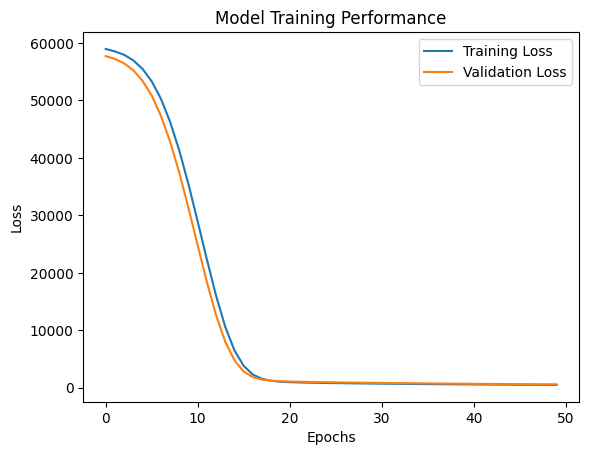

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [14]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


array([[226.31717],
       [249.88081],
       [311.2535 ],
       [220.60094],
       [269.06662],
       [205.99449],
       [245.79031],
       [287.88477],
       [248.92764],
       [246.1013 ],
       [308.0649 ],
       [230.90788],
       [214.61626],
       [221.75755],
       [247.88055],
       [244.54857],
       [262.14627],
       [204.67317],
       [260.1154 ],
       [264.69885],
       [204.96222],
       [252.25958],
       [255.02449],
       [222.70326],
       [214.10913],
       [198.41281],
       [222.2875 ],
       [250.42339],
       [204.1385 ],
       [255.48401],
       [273.502  ],
       [276.3762 ],
       [213.26984],
       [274.859  ],
       [205.26556],
       [174.83145],
       [230.53494],
       [188.3336 ],
       [255.33072],
       [275.33365],
       [212.21838],
       [190.97043],
       [197.17923],
       [215.87033],
       [185.04501],
       [236.77069],
       [219.83351],
       [229.61797],
       [225.75494],
       [225.59991],


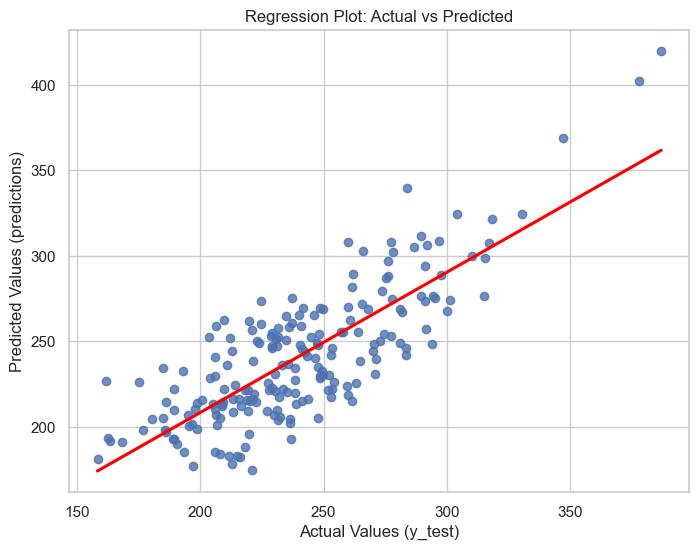

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create scatter + regression line plot
sns.regplot(x=y_test, y=predictions, ci=None, line_kws={"color": "red"})

# Add labels
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (predictions)")
plt.title("Regression Plot: Actual vs Predicted")
plt.show()